In [43]:
import pandas as pd
from pygam import ExpectileGAM, s, f
from sklearn.model_selection import train_test_split
import sqlalchemy
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
query='''
SELECT th.[TranDate],p.[StockCode],
tl.[UnitRateBase] AS Unit_Price,
SUM(tl.[Quantity]) AS qty ,SUM(tl.[ImpactAmount]) AS sales,
SUM(tl.[LineTotalCost]) AS Cost, c.[category]
  FROM [PowerBI].[dbo].[TransactionLine] tl
  LEFT JOIN [PowerBI].[dbo].[Product] p ON p.[ProductId]= tl.[ProductId]
  LEFT JOIN [PowerBI].[dbo].[Subsidiary] s ON s.[SubsidiaryId]=tl.[SubsidiaryId]
  LEFT JOIN [PowerBI].[dbo].[TransactionHeader] th ON th.[TransactionId] = tl.[TransactionId]
  LEFT JOIN [PowerBI].[dbo].[Customer] c ON c.[CustomerId] = th.[Entity]
  
  WHERE s.[SubsidiaryId] IN (1,3)
  AND p.[status] IN ('Current', 'B2C', 'promo', 'clearance') AND tl.[TransactionType] IN ('Invoice', 'Cash Sale') 
  AND tl.[GlId]=54
 AND tl.[UnitRateBase]<>0 
  GROUP BY p.[StockCode], tl.[UnitRateBase], c.[category], th.[TranDate]
'''

In [45]:
engine=sqlalchemy.create_engine("mssql://@192.168.35.102/PowerBi?driver=SQL Server")
connection=engine.connect()
result=connection.execute(sqlalchemy.text(query))

data=[row for row in result]
connection.close()

df=pd.DataFrame(data)
df.head()

,TranDate,StockCode,Unit_Price,qty,sales,Cost,category
0,2019-05-07 00:00:00,A-464758,26.34000000,1,26.3400,15.17000000,Direct Dispatch
1,2021-03-31 00:00:00,A-BW52123-21,3.88000000,180,698.4000,505.80000000,Domestic
2,2021-08-19 00:00:00,A-BW5612ZGB,245.72000000,10,2457.2000,1768.80000000,Domestic
3,2020-08-06 00:00:00,B162,1.93000000,200,386.0000,250.00000000,Domestic
4,2019-05-21 00:00:00,B162,1.98000000,100,198.0000,122.00000000,Domestic


<Axes: xlabel='Unit_Price', ylabel='qty'>

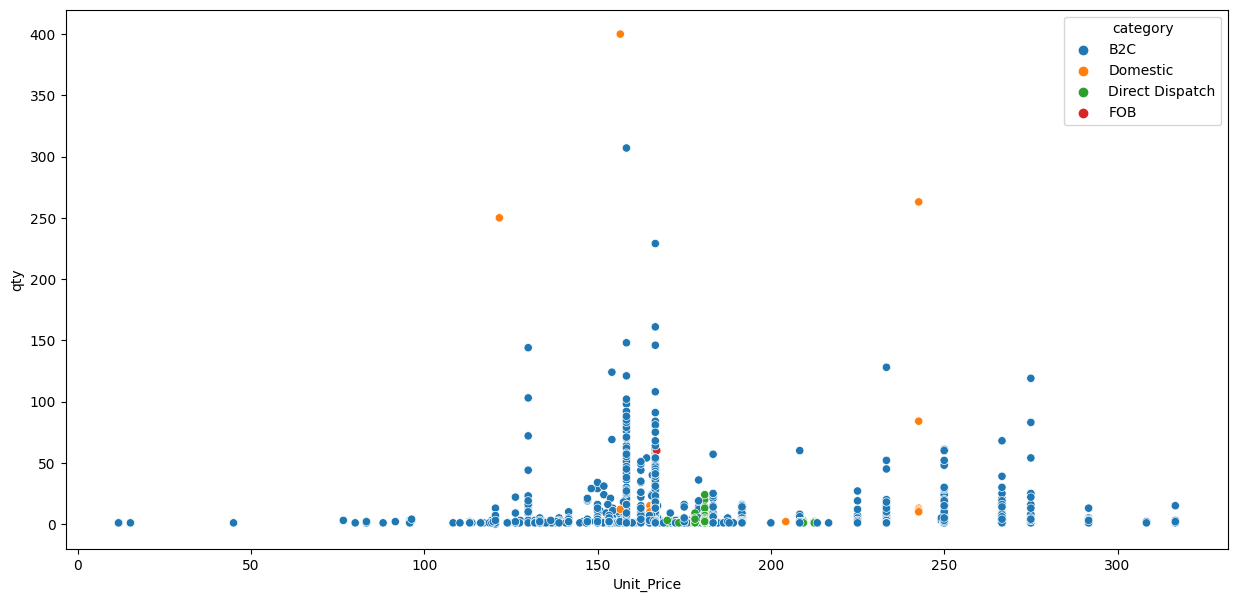

In [20]:
df1=df[(df["StockCode"]=="BW65350")]

plt.figure(figsize=(15,7))
sns.scatterplot(data=df1, x="Unit_Price", y="qty", hue="category")


In [21]:
pd.set_option("display.max_rows", None)
df1.sort_values(by='TranDate', ascending=True)

,TranDate,StockCode,Unit_Price,qty,sales,Cost,category
127310,2021-03-05 00:00:00,BW65350,165.10000000,12,1981.2000,1041.72000000,Domestic
118407,2021-03-08 00:00:00,BW65350,249.99000000,18,4499.8200,1562.58000000,B2C
176088,2021-03-09 00:00:00,BW65350,249.99000000,1,249.9900,86.81000000,B2C
181779,2021-03-10 00:00:00,BW65350,249.99000000,8,1999.9200,694.48000000,B2C
180060,2021-03-11 00:00:00,BW65350,291.66000000,1,291.6600,86.81000000,B2C
137091,2021-03-12 00:00:00,BW65350,180.92000000,1,180.9200,86.81000000,Direct Dispatch
300976,2021-03-12 00:00:00,BW65350,291.66000000,1,291.6600,86.81000000,B2C
162934,2021-03-12 00:00:00,BW65350,156.56000000,12,1878.7200,1041.72000000,Domestic
300977,2021-03-15 00:00:00,BW65350,291.66000000,3,874.9800,260.43000000,B2C
146581,2021-03-15 00:00:00,BW65350,180.92000000,8,1447.3600,694.48000000,Direct Dispatch


C:\Users\v.murleedharan\AppData\Local\Temp\ipykernel_6564\4273532109.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Unit_Price"]=pd.to_numeric(df1["Unit_Price"], errors='coerce')


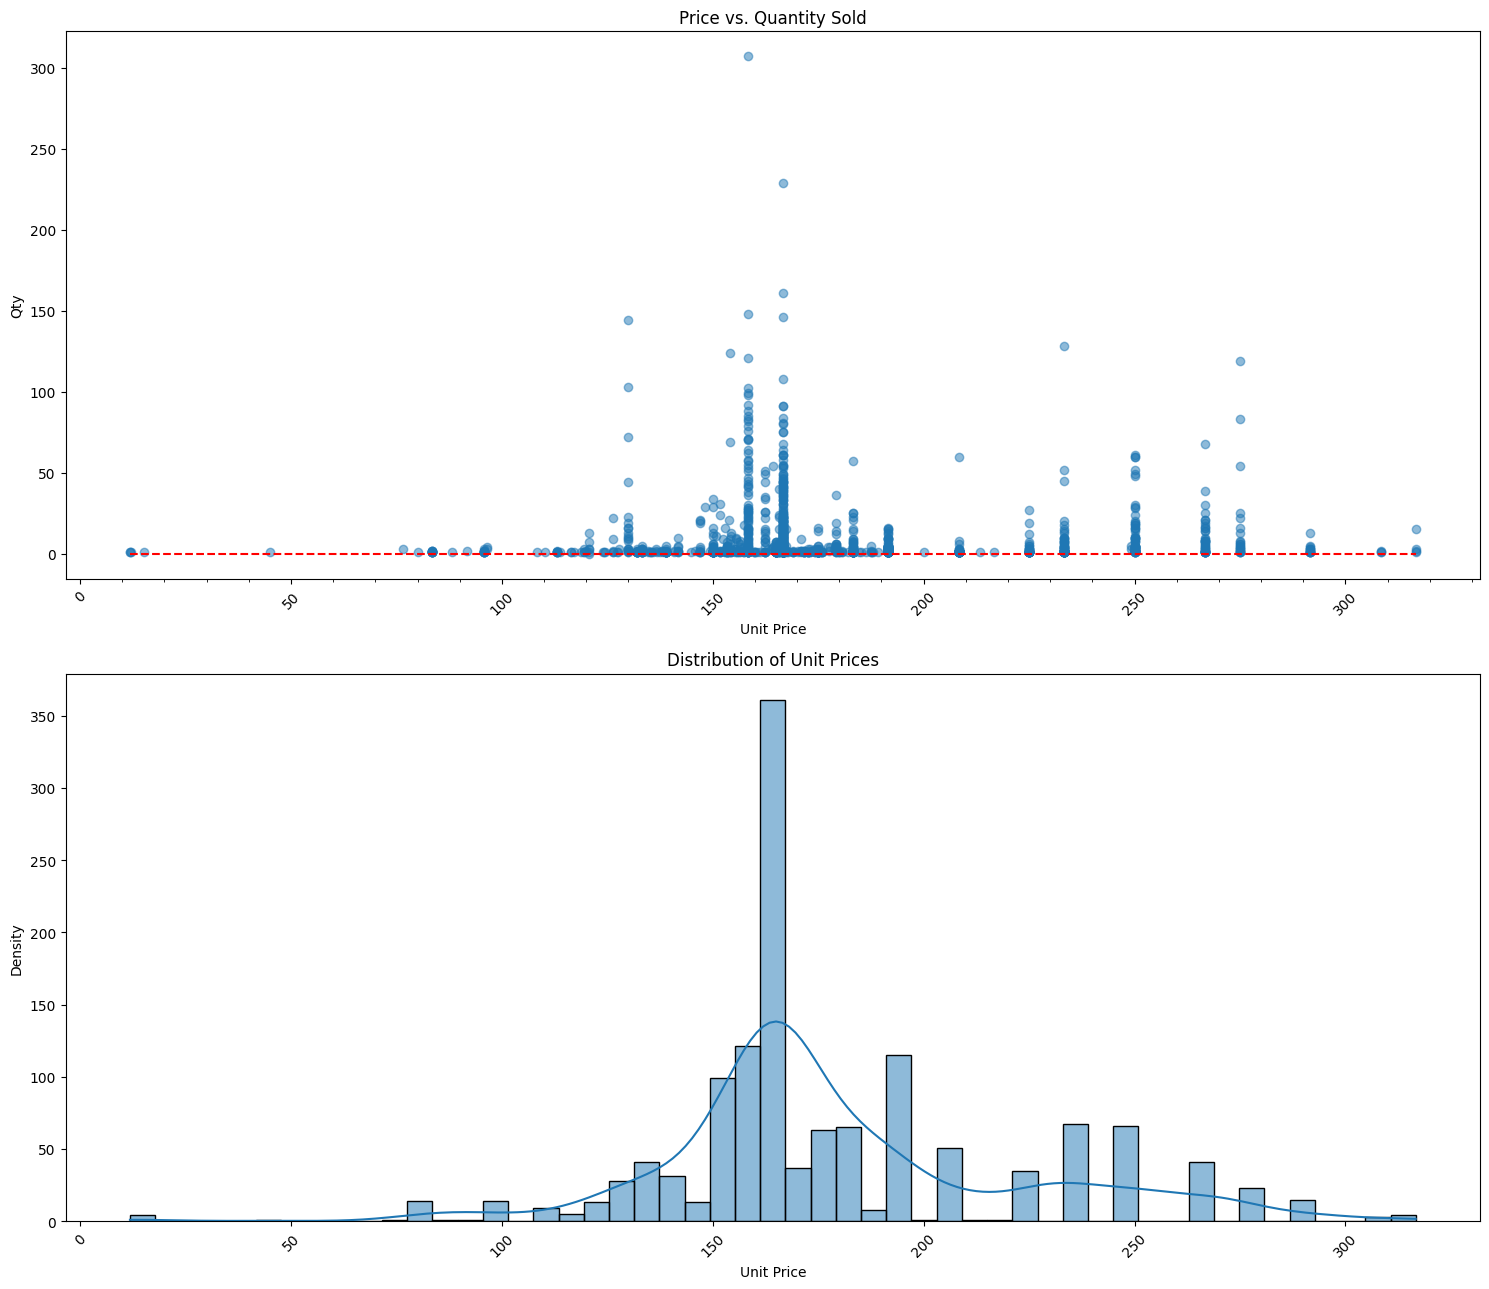

In [22]:
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker

df1=df[(df["StockCode"]=="BW65350")& (df["category"]=="B2C")]
df1["Unit_Price"]=pd.to_numeric(df1["Unit_Price"], errors='coerce')
X=df1["Unit_Price"].to_numpy().reshape(-1, 1)
y=df1["qty"]

fig, ax = plt.subplots(2, 1, figsize=(15, 13))

# Scatter plot on the first subplot
ax[0].scatter(X, y, alpha=0.5)
ax[0].set_xlabel("Unit Price")
ax[0].set_ylabel("Qty")
XX = np.linspace(float(df1["Unit_Price"].min()), float(df1["Unit_Price"].max()), 100).reshape(-1,1)
ax[0].plot(XX, [0]*len(XX), 'r--')

# Increase the density of ticks on the x-axis
ax[0].xaxis.set_major_locator(ticker.AutoLocator())  # Automatically adjust ticks
ax[0].xaxis.set_minor_locator(ticker.AutoMinorLocator())  # Add minor ticks for more granularity

# Rotate labels for readability
for label in ax[0].get_xticklabels(which='both'):  # Get both major and minor tick labels
    label.set_rotation(45)

ax[0].set_title('Price vs. Quantity Sold')

# Distribution plot on the second subplot
sns.histplot(df1["Unit_Price"], kde=True, ax=ax[1])
ax[1].set_xlabel("Unit Price")
ax[1].set_ylabel("Density")
ax[1].set_title('Distribution of Unit Prices')

# Ensure labels for the distribution plot are rotated for readability
for label in ax[1].get_xticklabels():
    label.set_rotation(45)

plt.tight_layout()
plt.show()

In [47]:
import scipy.stats as stats

statistic, p_value=stats.shapiro(df1["Unit_Price"])
print("Shapiro_wilk test statsistic:", statistic)
print("p-value:", p_value)

#High p-value (e.g., > 0.05): Generally indicates that you fail to reject the null hypothesis. This suggests that the data might be normally distributed (but doesn't definitively confirm it).

#Low p-value (e.g., < 0.05): We reject the null hypothesis. This suggests that the data is likely not normally distributed.

#Since data is not normally distributed cannot use OLS

Shapiro_wilk test statsistic: 0.9216539859771729
p-value: 6.166141742718936e-26


In [61]:
print(df1["Unit_Price"].describe())

count    1350.000000
mean      179.918483
std        42.209410
min        11.810000
25%       158.330000
50%       166.660000
75%       191.660000
max       316.660000
Name: Unit_Price, dtype: float64


# OLS Regression Results     

                            OLS Regression Results                            
Dep. Variable:                    qty   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     3.845
Date:                Sat, 09 Mar 2024   Prob (F-statistic):           1.42e-45
Time:                        13:43:33   Log-Likelihood:                -7312.3
No. Observations:                1657   AIC:                         1.497e+04
Df Residuals:                    1482   BIC:                         1.592e+04
Df Model:                         174                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

C:\Users\v.murleedharan\AppData\Local\anaconda3\Lib\site-packages\statsmodels\graphics\regressionplots.py:566: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.tight_layout()


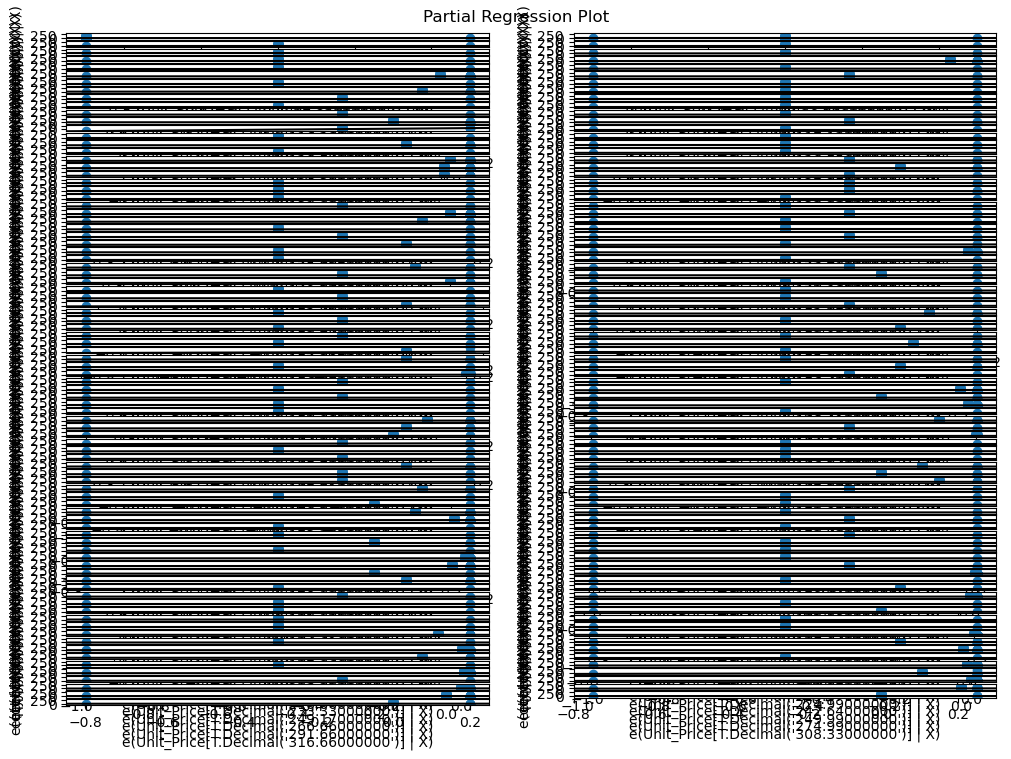

In [70]:

import statsmodels.api as sm
import statsmodels.formula.api as smf
subset_df = df1
# Then re-run the model fit on this reduced dataset
model = smf.ols("qty ~ Unit_Price", data=subset_df).fit()
print(model.summary())
# Plotting the partial regression plot
fig = plt.figure(figsize=(12, 8))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)

C:\Users\v.murleedharan\AppData\Local\Temp\ipykernel_36464\566138727.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Unit_Price"] = df1["Unit_Price"].astype(float)
C:\Users\v.murleedharan\AppData\Local\Temp\ipykernel_36464\566138727.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["qty"] = df1["qty"].astype(float)


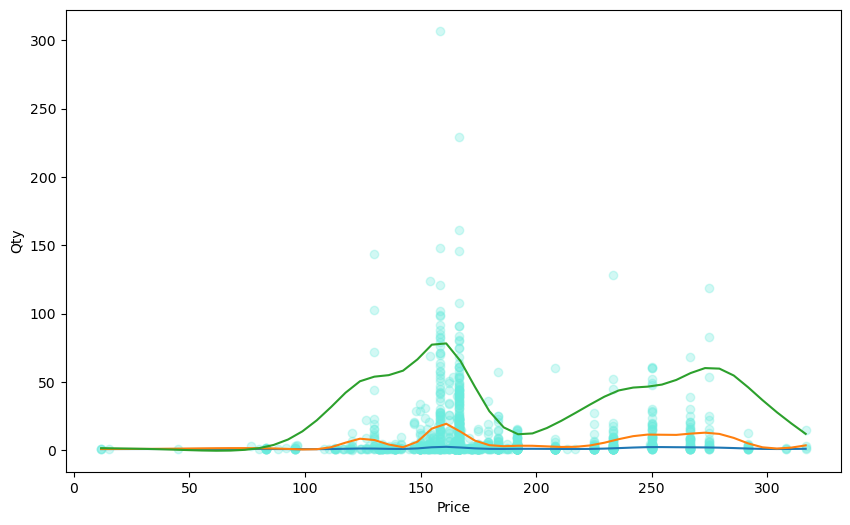

In [27]:
quantiles=[0.025,0.5,0.975]
gam_i_results={}

for q in quantiles:
    gam=ExpectileGAM(s(0, n_splines=30), expectile=q)
    gam.fit(X,y)
    gam_i_results[q]=gam

df1["Unit_Price"] = df1["Unit_Price"].astype(float)
df1["qty"] = df1["qty"].astype(float)

plt.figure(figsize=(10,6))
plt.scatter(df1["Unit_Price"], df1["qty"], alpha=0.3, c='#6AEBDD')

plt.xlabel("Price")
plt.ylabel("Qty")

XX=np.linspace(df1["Unit_Price"].min(), df1["Unit_Price"].max()).reshape(-1,1)

for q, gam in gam_i_results.items():
    plt.plot(XX, gam.predict(XX), label=f"{int(q*100)}th Quantile GAM")


# Log Log Regression

In [32]:
import statsmodels.api as sm
df3=[]
df3=pd.DataFrame(df3)

df3['log_Price'] = np.log(df1['Unit_Price'].astype(float))
df3['log_QuantitySold'] = np.log(df1['qty'].astype(float))

# Define independent variables (X) and the dependent variable (y)
X = df3[['log_Price']]  # Add more variables as needed
y = df3[['log_QuantitySold']]

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y,X).fit()

# Print out the statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       log_QuantitySold   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 18 Mar 2024   Prob (F-statistic):                nan
Time:                        05:17:47   Log-Likelihood:                    nan
No. Observations:                1353   AIC:                               nan
Df Residuals:                    1351   BIC:                               nan
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const            -inf        nan        nan        n

C:\Users\v.murleedharan\AppData\Local\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\v.murleedharan\AppData\Local\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1732: RuntimeWarning: invalid value encountered in subtract
  return np.sum(weights * (model.endog - mean)**2)


Text(0, 0.5, 'Log Qty')

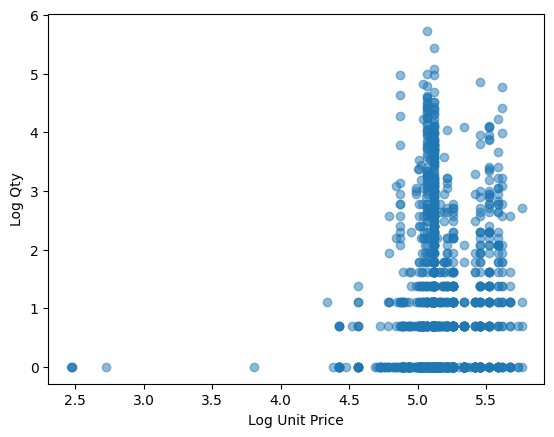

In [36]:

plt.scatter(X["log_Price"],y, alpha=0.5)
plt.xlabel("Log Unit Price")
plt.ylabel("Log Qty")

# since log price , Log Qty are non linear cannot use log- log regeression

# Calculating the Price elasticityat each point in curve

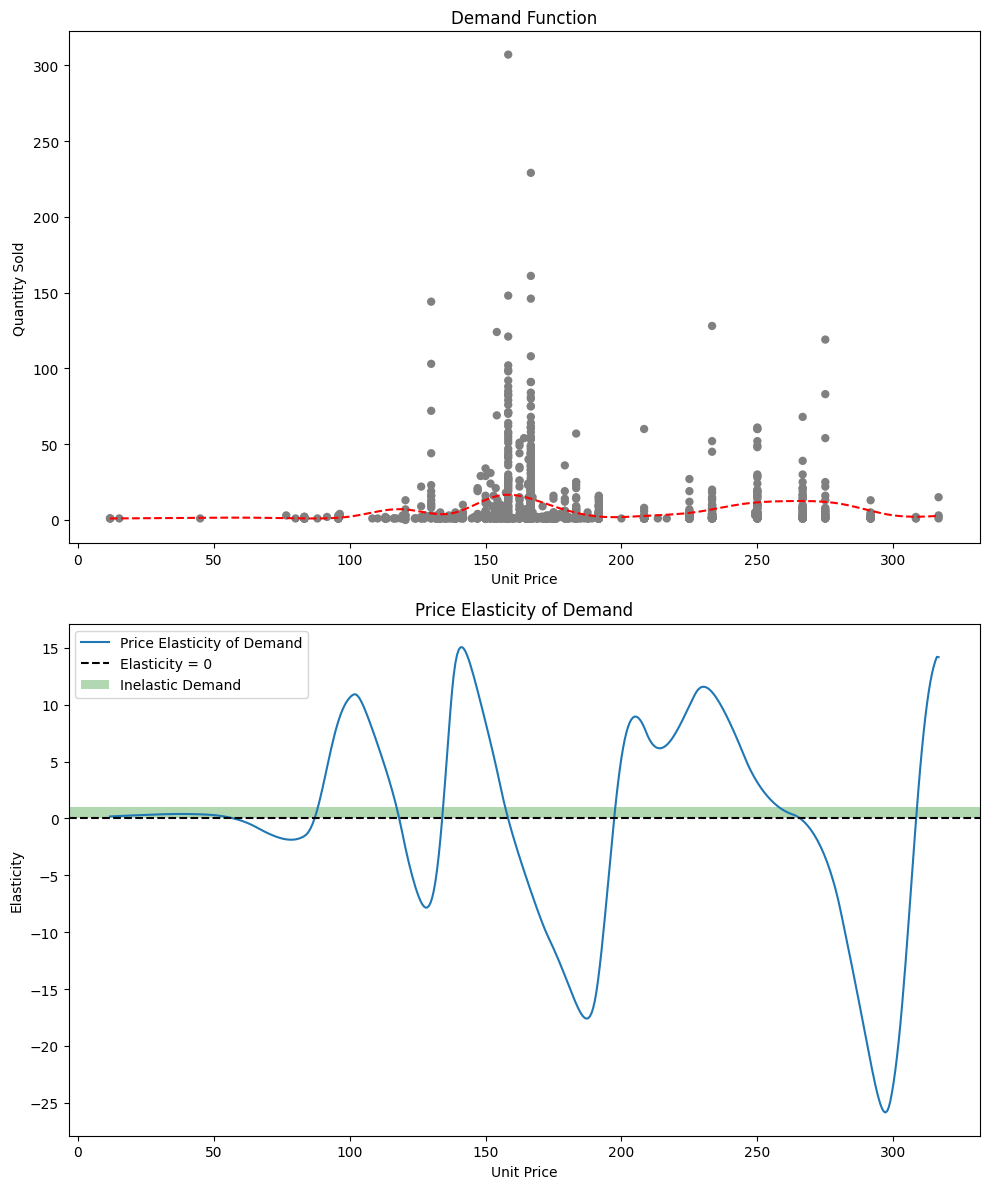

In [39]:
X = df1[['Unit_Price']].values
y = df1['qty'].values


gam = LinearGAM(s(0, n_splines=20)).fit(X, y)

# Generate a sequence of prices for prediction and elasticity analysis
XX = np.linspace(X.min(), X.max(), 500)[:, np.newaxis]
predicted_qty = gam.predict(XX)

# Manually approximate the derivative using numpy's gradient
# Note: This method approximates the derivative based on the discrete differences in the predicted quantity
gradients = np.gradient(predicted_qty.flatten(), XX.flatten())

# Calculate elasticity at each point
elasticities = gradients * (XX.flatten() / predicted_qty.flatten())

# Plotting the demand curve and elasticity
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# Demand function
ax[0].plot(XX, predicted_qty, 'r--')
ax[0].scatter(X, y, facecolor='gray', edgecolors='none')
ax[0].set_title('Demand Function')
ax[0].set_xlabel('Unit Price')
ax[0].set_ylabel('Quantity Sold')

# Elasticity
ax[1].plot(XX.flatten(), elasticities, label='Price Elasticity of Demand')
ax[1].axhline(0, color='black', ls='--', label='Elasticity = 0')
ax[1].axhspan(1, 0, facecolor='green', alpha=0.3, label='Inelastic Demand')
#ax[1].axhspan(-np.inf, -1, facecolor='blue', alpha=0.3, label='Elastic Demand')
ax[1].set_xlabel('Unit Price')
ax[1].set_ylabel('Elasticity')
ax[1].set_title('Price Elasticity of Demand')
ax[1].legend()

plt.tight_layout()
plt.show()

In [46]:
r2 = gam.score(X, y)
print("R2 value: ", r2)
print("Elasticity: ", np.mean(elasticities))

R2 value:  0.06659920767247585
Elasticity:  -0.2959523708474887
